# Audio Machine Learning
## Worksheet - NumPy Arrays and Plotting
-----

Welcome! In this notebook, you'll learn about NumPy Arrays and Plotting.

There are weekly computer lab sessions, 11:10-13:00 on Fridays in Computer Lab B.51, Hugh Robson Building. To get the most out of these sessions, I **strongly** recommend you work through the worksheet in your own time before attending the session.

## 1 - NumPy

In this seciton we'll introduce NumPy. NumPy is a Python *library*, a collection of modules that are not included in the base Python distribution. NumPy is short for 'Numerical Python'.

We want to use NumPy because it allows us to do matrix operations and work with arrays of numbers. The ability to do this is limited using the standard Python library.

For example, say we want to add two vectors together:



$$
a = \begin{bmatrix} 5 \\ 7 \end{bmatrix}, \quad
b = \begin{bmatrix} 4 \\ 1 \end{bmatrix}, \quad
c = a + b = \begin{bmatrix} 5 + 4 \\ 7 + 1 \end{bmatrix} = \begin{bmatrix} 9 \\ 8 \end{bmatrix}
$$

We could try and do this using Python lists:

In [1]:
a = [5, 7]
b = [4, 1]
c = a + b

print(c)

[5, 7, 4, 1]


However, the addition operator simply concatenates lists together, instead of summing their entries. For the kind of mathematical operations required in Machine Learning, it is more practical to use NumPy Arrays.

### 1.1 - NumPy arrays
To use NumPy, we must first import it:

In [2]:
import numpy as np  # The 'as' keyword allows you to name the numpy module - numpy is usually imported as 'np'

In numpy, an `array` is a multidimensional set of numbers. We can create numpy arrays as follows:

In [3]:
a = np.array([5, 7])
b = np.array([4, 1])

This created two variables, a and b, which are one-dimensional arrays (also known as *vectors*)

---
### ✏️✏️ Exercise ✏️✏️
---

Try creating the vector c that is described above, by summing the two NumPy arrays a and b:


In [5]:
# Your code here

c = a + b
c

array([9, 8])

In [6]:
assert np.max(c - np.array([9, 8])) == 0, "c should contain the values [9, 8]"

We can access specific elements of the array using square brackets, [], this is often known as *indexing*:

In [7]:
a[0]  # This accesses the first element of the numpy array 'x'

np.int64(5)

---
### ✏️✏️ Exercise ✏️✏️
---

Try doing the following, and observe what happens:
- Use the print and type functions on the variables `a` and `b`.
- Create a new variables `z`, that is creating by adding the second element of the array `a` to the first element of the array `b`.
- Try the following indexing:  `x[-1]` , what happens?

In [11]:
# Your code here
z = a[1] + b[0]
z

np.int64(11)

In [12]:
assert z == 11, "z should equal 11"

---
### 1.2 - NumPy Matrices
In NumPy, matrices are generally represented as two-dimensional arrays. We can create a two-dimensional array as follows:

In [13]:
x = np.array([[1, 2], [3, 4]])

This created a NumPy array representing the following matrix:

$$x = 
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
$$

Variables in Python usually have attributes associated with them. These can be accessed using the following syntax `x.attribute`.

For example, we can find out the shape of an array as follows:

In [14]:
x.shape

(2, 2)

---
### ✏️✏️ Exercise ✏️✏️
---

Arrays have an attribute called 'ndim', which represents the number of dimensions the array has.
- Access the 'ndim' attribute of the array `x` and save it to a variable called `x_ndim`
- Access the 'ndim' attribute of the array `a` and save it to a variable called `a_ndim`

In [15]:
# Your code here
x_ndim = x.ndim
a_ndim = a.ndim

In [16]:
# Run this cell to check your answer
assert x_ndim == 2, "x_ndim should equal 2, because x is a two-dimensional array"
assert a_ndim == 1, "a_ndim should equal 1, because a is a one-dimensional array"
print("correct!")

correct!


NumPy arrays also have a 'dtype' attribute. Confusingly, this is slightly different to the 'type' you get by typing:

In [17]:
type(x)  # This tells you that the array x is a numpy array

numpy.ndarray

In [18]:
x.dtype  # This tells you the data type of the elements of the array

dtype('int64')

In the above case, we can see that x is comprised of integers, because we used integers when we created the array.

---
### ✏️✏️ Exercise ✏️✏️
---

Try creating a new array called `x_float`, it should contain the same values as `x`, but the elements should be floats instead of integers.

In [22]:

x_float = x.astype(float)

In [23]:
assert x_float.dtype == float, f"the elements of x_float should be type float, but they are type {x_float.dtype}"
assert np.max(x_float - x) == 0, "The values contained in x_float are not the same as the values contained in x"
print("correct!")

correct!


---
### 1.3 - Methods, Functions, and NumPy arrays

A *method* is a function that is associated with an object. For example, arrays have methods such as `.sum()` and `.mean()`, which return the sum or the mean of the elements of the array. for example:

In [24]:
x = np.array([1, 4, 6])
print(f"the sum of the elements of the array x is equal to: {x.sum()}")

the sum of the elements of the array x is equal to: 11


You can also sum the elements of an array using the numpy `sum` function, as follows:

In [25]:
np.sum(x)

np.int64(11)

---
### ✏️✏️ Exercise ✏️✏️
---

The mean of an array is the sum of its elements, divided by the number of elements. Find the mean of the array x:
- Using the `mean()` method
- Using the `np.mean()` function
- Calculating it using the `.sum()` method and the `.size` attribute

Check you get the same result in each case.

In [31]:
# Your code here
# x.mean()
# np.mean(x)
mean = x.sum() / x.size

mean


np.float64(3.6666666666666665)

---
### 1.4 - Generating a Dataset with NumPy

Later we will load a dataset from a file, but for now we can generate a dataset.

Let's say we want to make a model that predicts the value of a home, based on the total area of the home (in $m^2$)

In this case, the input feature $x$ in our dataset is size ($m^2$), and the target variable $y$ we are trying to predict is the home value (£).

We will generate 10 data points randomly:


In [8]:
np.random.seed(42) # This sets up the 'random number generator' for numpy, ensuring the same 'random' numbers are generated each time
home_sizes = np.random.uniform(50, 300, 10)  # This randomly generates 10 numbers between 50 and 500
print(home_sizes)

[143.63502971 287.6785766  232.99848545 199.66462105  89.00466011
  88.99863008  64.52090304 266.54403644 200.27875294 227.01814445]


We will now create the target variables, such that they have a linear relationship to home size:

In [9]:
home_prices = home_sizes * 2000 + 30000
home_prices += np.random.randn(10) * 10000
print(home_prices)

[312575.31556433 610782.75364082 491362.79397758 424671.94456282
 210428.94293688 188864.45772152 141792.62775897 557465.19759506
 420429.19466826 487178.76222398]


The vectors x and y contain 10 examples of a home size and the corresponding sale price. So, for example, the first house in the dataset:

In [ ]:
print(f"The first home in the dataset has a size of {home_sizes[0]}, and a sale price of {home_prices[0]}")

And second home in the dataset:

In [ ]:
print(f"The second home in the dataset has a size of {home_sizes[1]}, and a sale price of {home_prices[1]}")

---
### ✏️✏️ Exercise ✏️✏️
---
Find the following:
- The mean home size in the dataset
- The mean home sale price in the dataset
- The largest and the smallest home in the dataset (hint: use the np.min() and np.max() functions)

In [59]:
# Your code here

mean_home_size = home_sizes.mean()
print(mean_home_size)
mean_home_price = home_prices.mean()
print(mean_home_price)

home_sizes.min()

np.max(home_sizes)


180.03418398816873
388789.3702335054


np.float64(287.67857660247904)

It is hard to visualise data by looking at arrays... We will now look at using plotting to make it easier to see our data!

# 2 - Plotting

For plotting data and creating graphics, we will be using a Python library called matplotlib:

In [3]:

import matplotlib.pyplot as plt
import numpy as np

Below we will create a scatter plot, which plots the input feature `x` against the target `y`.

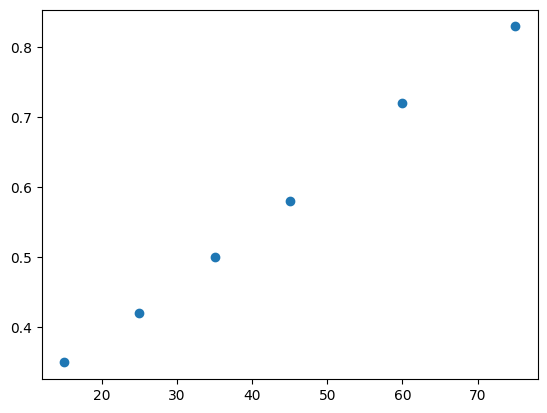

In [4]:
x = np.array([15, 25, 35, 45, 60, 75])
y = np.array([0.35, 0.42, 0.50, 0.58, 0.72, 0.83])
plt.scatter(x, y) # x and y must contain the same number of elements

This is a minimum working example of a scatter plot. The first argument provided to plt.scatter() represents the x-axis, and the second arguments represents the y-axis.


### 2.1 - Formating Plots
We can also add some more information to the plot as follows:

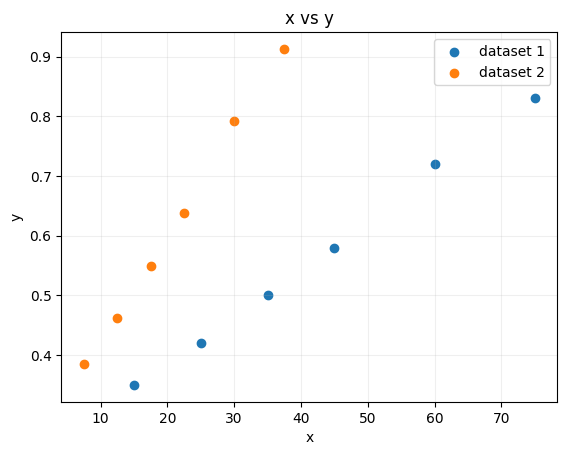

In [5]:
plt.scatter(x, y, label='dataset 1') # The label argument allows us to label a set of points
plt.scatter(x*0.5, y*1.1, label='dataset 2') # The label argument allows us to label a set of points
plt.title("x vs y") # This creates the plot title
plt.xlabel("x") # This labels the x-axis
plt.ylabel("y") # This labels the y-axis
plt.grid(True, alpha=0.2)
plt.legend() # Use plt.legend() to display the labels on the plot
plt.show()

By default, the limits of the x and y axis are set based on the range of values plotted. We can also set them manually (for example if we want to include 0 in the axis range):

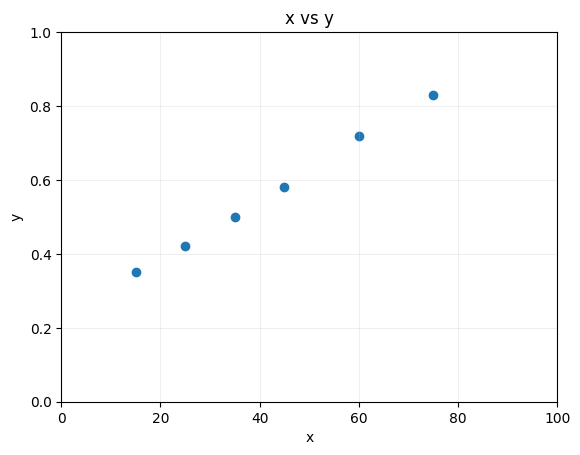

In [6]:
plt.scatter(x, y)
plt.title("x vs y") # This creates the plot title
plt.xlabel("x") # This labels the x-axis
plt.ylabel("y") # This labels the y-axis
plt.xlim([0, 100]) # This sets the x-axis range from 0 to 100
plt.ylim([0, 1]) # This sets the y-axis range from 0 to 1
plt.grid(True, alpha=0.2)
plt.show()

---
### ✏️✏️ Exercise ✏️✏️
---
Plot our home price dataset from earlier! Adapt the above code, so it plots:
- The `home_sizes` on the x-axis
- The `home_prices` on the y-axis
- Label the axes properly (including units)

The result should look something like the 'HomeSize_vs_HomePrice.jpg' image that was included with this worksheet.

Text(0.5, 0, 'House Sizes')

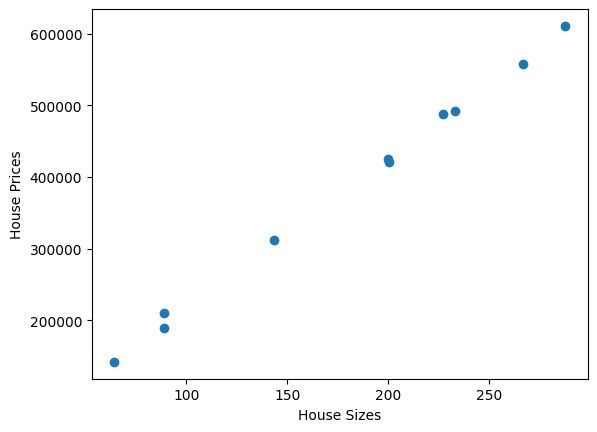

In [11]:
# Your Code Here

plt.scatter(home_sizes,home_prices)
plt.ylabel("House Prices")
plt.xlabel("House Sizes")

### 2.2 - Applying the Linear Model

The Linear Model is defined as:

$$f(x) = mx + c = \hat{y}$$

Where $\hat{y}$ is the Linear Model's prediction, $x$ is the input feature (i.e Home Size), and $m$ and $c$ are the Linear Model's *Parameters*.

The Linear Model is a function of x, (this is what '$f(x)$' means). For a given input feature, i.e:

$$x = 40.6$$

The Linear Model's prediction, $\hat{y}$, is given by:

$$f(x) = \hat{y} = 40.6 * m + c$$

The Linear Model describes a relationship between $x$ and $y$. To *fit* the Linear Model, we find the single value of $m$ and the single value of $c$ that minimises the model's prediction error, over the entire dataset.


Let's practice applying the Linear Model to the dataset we generated earlier.

NumPy Arrays allow you to multiply every element in the array by a single number, as follows:

In [12]:
an_array = np.random.randn(5) # Generate an array of 5 random numbers
print(f'Initial Array values: \n {an_array}')
multiplied_array = an_array*2 # Multiply the array by a constant, see that each element has been multiplied by 2
print(f'Array values after multiplication: \n {multiplied_array}')

Initial Array values: 
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282 ]
Array values after multiplication: 
 [-1.81604815 -2.8246074   2.93129754 -0.4515526   0.13505641]


Likewise, we can add a constant to every element in the array aswell:

In [13]:
print(f'Initial Array values: \n {an_array}')
added_array = an_array + 10 # Add a constant to every element in the array
print(f'Array values after addition: \n {added_array}')

Initial Array values: 
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282 ]
Array values after addition: 
 [ 9.09197592  8.5876963  11.46564877  9.7742237  10.0675282 ]


We can use this to quickly apply the Linear Model to every item in the dataset, in a single line of code!

---

# 🎯🎯 Challenge! 🎯🎯

This `Challenge` section asks you to apply what is covered in the worksheet. I **Strongly** recommend you try and complete these challenges on your own! The best way to test if you've understood the content is to try and apply it.

---

## Apply the Linear Model and Plot the Results.

Your objective is to apply the Linear Model to the `home_prices` dataset we generated earlier, experimenting with fitting simple **Linear Models** to data.

The Linear Model has the form:

$$y = mx + c$$

where:
- $m$ is the slope (how steep the line is)  
- $c$ is the intercept (where the line crosses the y-axis)  

---

### Your Tasks:

1. **Try out three different models**  
   - Choose three different sets of values for $m$ and $c$.
       - Model 1 : $m=1800$, $c=20000$
       - Model 2 : $m=1800$, $c=50000$ 
       - Model 3 : $m=3000$, $c=80000$
   - Plot each line on a graph of the dataset.

2. **Compare predictions with real data**  
   - Use each model to make predictions, where `x = home_sizes`.  
   - Create a scatter plot comparing each model’s predictions, $\hat{y}$, with the true target values, $y$, where `y = home_prices`.

3. **Evaluate the models**  
   - Compute the **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)** for each model. (hint - use `np.mean()`, `np.square()` and `np.abs()`)  
   - Record the errors and think about what they mean.  

4. **Find a better model**  
   - Look back at the section where the dataset was generated.  
   - Can you figure out what a “good” choice of $m$ and $c$ might be?  
   - Plot this model and compare its errors with the others.

---

💡 **Hint:** A smaller MSE/MAE means the model fits the data better.


In [ ]:
# Your code here
from cProfile import label
from statistics import median


m_1 = 1800
c_1 = 20000

m_2 = 1800
c_2 = 50000

m_3 = 3000
c_3 = 80000

# Create a straight line

# Create an array with a range that is slightly bigger than the dataset
x = np.linspace(0,max(home_sizes)+20,100)

# Create the three lines. These are also my predictions
y_1 = m_1 * x + c_1
y_2 = m_2 * x + c_2
y_3 = m_3 * x + c_3

def model_comparison(model_m,model_c,real_data_input,real_data_output):
    y = model_m * real_data_input + model_c

    plt.scatter(real_data_input,real_data_output, label = "real")
    plt.scatter(real_data_input,y, label = "model")
    plt.ylabel("House Prices")
    plt.xlabel("House Sizes")
    plt.legend()
    plt.show()

    model_diff_abs = np.abs(real_data_output - y)
    mae = np.mean(model_diff_abs)
    mse = np.mean(model_diff_abs**2)

    return {
        "mean_absolute_errors" : mse,
        "mean_squared_errors" : mae
    }


def model_optimisation(real_data_input,real_data_output):

    start_c = 0
    start_m = 0

    step_size = 1

    m = np.zeros(100)

    # Sort the input data, and sort the output data in the same order
    idx = np.argsort(real_data_input)
    input_sorted = real_data_input[idx]
    output_sorted = real_data_output[idx]

    # Median value of input
    median_input = np.median(real_data_input)

    # Determine positive or negative correlation
    first_output = output_sorted[0]
    last_output = output_sorted[-1]
    # positive_or_negative = last_output - first_output
    first_grad_guess = (last_output - first_output) / (input_sorted[-1] - input_sorted[0])
    best_guess = first_grad_guess
    next_grad_guess = (best_guess + step_size)

    y_0 = best_guess * real_data_input + start_c
    y_1 = next_grad_guess * real_data_input + start_c

    model_diff_abs_y0 = np.abs(real_data_output - y_0)
    model_diff_abs_y1 = np.abs(real_data_output - y_1)
    # mae_y0 = np.mean(model_diff_abs_y0)
    mse_y0 = np.mean(model_diff_abs_y0**2)
    # mae_y1 = np.mean(model_diff_abs_y1)
    mse_y1 = np.mean(model_diff_abs_y1**2)

    for i in 

        if mse_y1 < mse_y0:
            best_guess = next_grad_guess
            next_grad_guess = best_guess + step_size
        elif mse_y1 == mse_y0:
            best_guess = best_guess
        else:
            best_guess = best_guess
            next_grad_guess = (best_guess - step_size)

    print(best_guess)
    print(next_grad_guess)

            







# plt.scatter(home_sizes,home_prices)
# plt.plot(x,y_1)
# plt.plot(x,y_2)
# plt.plot(x,y_3)
# plt.ylabel("House Prices")
# plt.xlabel("House Sizes")


In [49]:
model_optimisation(home_sizes,home_prices)

2102.6087791166624
2103.6087791166624


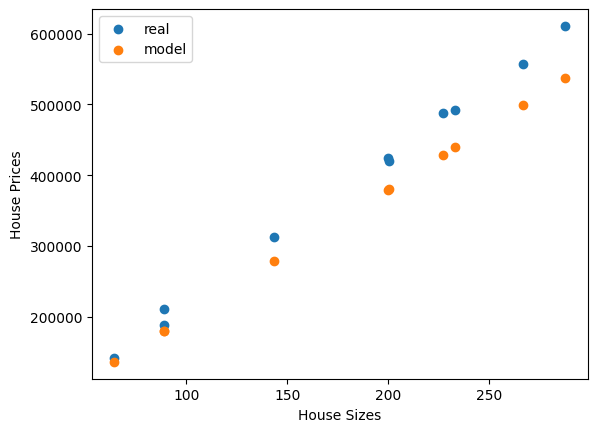

{'mean_absolute_errors': np.float64(2060173591.0223756),
 'mean_squared_errors': np.float64(40493.66788631712)}

In [35]:
model_comparison(m_1,c_1,home_sizes,home_prices)


If you have completed the challenge correctly, your plots should look something like the .jpg images included with this Notebook. Check that your MSE/MAE values match those displayed in the image.

### Final Remarks

This was not a very practical method for finding $m$ and $c$, in reality, we will find this parameters using *optimisation*. You will do this in week 2 of the course!